<a href="https://colab.research.google.com/github/Hirva98/Twitter-Spam-Detection/blob/main/Twitter_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/sample_data/train - train.csv")
dataset.head(10)
dataset.isna().sum()


Tweet             0
Type              0
Unnamed: 2    20897
dtype: int64

In [ ]:
del dataset["Unnamed: 2"]
dataset.head(10)

,Tweet,Type
0,Good Morning Love @LeeBrown_V,Quality
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam
2,Haven't been following the news but I understa...,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam
6,please don't talk about me like that i'm only ...,Quality
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality
8,Banking on Brexit: is it time to Invest in the...,Spam
9,They are serving and protecting #5WordRegrets ...,Spam




```
# This is formatted as code
```

# New section

In [ ]:
import re

def clean_url(tweet):
  return re.sub(r'http\S+', '', tweet)

dataset['CleanTweet']= dataset['Tweet'].apply(clean_url)
dataset.head(10)

,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love @LeeBrown_V
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,@realDonaldTrump @USNavy RIP TO HEROES'
2,Haven't been following the news but I understa...,Quality,Haven't been following the news but I understa...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pic.twitter.com/dy9q4ftLhZ What to do with pap...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,#DidYouKnow ► Mahatma Gandhi made a brief visi...
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,"#amms Samantha Bee Tries to ATTACK Trump, Inst..."
6,please don't talk about me like that i'm only ...,Quality,please don't talk about me like that i'm only ...
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,Politics …
8,Banking on Brexit: is it time to Invest in the...,Spam,Banking on Brexit: is it time to Invest in the...
9,They are serving and protecting #5WordRegrets ...,Spam,They are serving and protecting #5WordRegrets


In [ ]:
def clean_non_alphanumeric(tweet):
  return re.sub('[^a-zA-Z]',' ',tweet)

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_non_alphanumeric)
dataset.head(15)

,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrown V
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES
2,Haven't been following the news but I understa...,Quality,Haven t been following the news but I understa...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pic twitter com dy q ftLhZ What to do with pap...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow Mahatma Gandhi made a brief visi...
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,amms Samantha Bee Tries to ATTACK Trump Inst...
6,please don't talk about me like that i'm only ...,Quality,please don t talk about me like that i m only ...
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,Politics
8,Banking on Brexit: is it time to Invest in the...,Spam,Banking on Brexit is it time to Invest in the...
9,They are serving and protecting #5WordRegrets ...,Spam,They are serving and protecting WordRegrets


In [ ]:
def clean_lowercase(tweet):
  return str(tweet).lower()

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_lowercase)
dataset.head(15)

,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,good morning love leebrown v
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,realdonaldtrump usnavy rip to heroes
2,Haven't been following the news but I understa...,Quality,haven t been following the news but i understa...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pic twitter com dy q ftlhz what to do with pap...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,didyouknow mahatma gandhi made a brief visi...
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,amms samantha bee tries to attack trump inst...
6,please don't talk about me like that i'm only ...,Quality,please don t talk about me like that i m only ...
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,politics
8,Banking on Brexit: is it time to Invest in the...,Spam,banking on brexit is it time to invest in the...
9,They are serving and protecting #5WordRegrets ...,Spam,they are serving and protecting wordregrets


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def clean_tokenization(tweet):
  return word_tokenize(tweet)

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_tokenization)
dataset.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,"[good, morning, love, leebrown, v]"
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,"[realdonaldtrump, usnavy, rip, to, heroes]"
2,Haven't been following the news but I understa...,Quality,"[haven, t, been, following, the, news, but, i,..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,"[pic, twitter, com, dy, q, ftlhz, what, to, do..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,"[didyouknow, mahatma, gandhi, made, a, brief, ..."
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,"[amms, samantha, bee, tries, to, attack, trump..."
6,please don't talk about me like that i'm only ...,Quality,"[please, don, t, talk, about, me, like, that, ..."
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,[politics]
8,Banking on Brexit: is it time to Invest in the...,Spam,"[banking, on, brexit, is, it, time, to, invest..."
9,They are serving and protecting #5WordRegrets ...,Spam,"[they, are, serving, and, protecting, wordregr..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
  return [item for item in token if item not in stop_words]

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_stopwords)
dataset.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,"[good, morning, love, leebrown, v]"
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,"[realdonaldtrump, usnavy, rip, heroes]"
2,Haven't been following the news but I understa...,Quality,"[following, news, understand, eff, dumbest, th..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,"[pic, twitter, com, dy, q, ftlhz, paper, sciss..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,"[didyouknow, mahatma, gandhi, made, brief, vis..."
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,"[amms, samantha, bee, tries, attack, trump, in..."
6,please don't talk about me like that i'm only ...,Quality,"[please, talk, like, little, tipsy]"
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,[politics]
8,Banking on Brexit: is it time to Invest in the...,Spam,"[banking, brexit, time, invest, uk, colin, war..."
9,They are serving and protecting #5WordRegrets ...,Spam,"[serving, protecting, wordregrets]"


In [ ]:
"""
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


def clean_stem(token):
  return [stemmer.stem(i) for i in token]

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_stem)
dataset.head(10)
"""

"\nfrom nltk.stem import PorterStemmer\nstemmer = PorterStemmer()\n\n\ndef clean_stem(token):\n  return [stemmer.stem(i) for i in token]\n\ndataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_stem)\ndataset.head(10)\n"

In [ ]:

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

def clean_lemmatization(token):
  return [lemma.lemmatize(word = w, pos = 'v') for w in token]

dataset['CleanTweet'] = dataset['CleanTweet'].apply(clean_lemmatization)
dataset.head(10)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,"[good, morning, love, leebrown, v]"
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,"[realdonaldtrump, usnavy, rip, heroes]"
2,Haven't been following the news but I understa...,Quality,"[follow, news, understand, eff, dumbest, things]"
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,"[pic, twitter, com, dy, q, ftlhz, paper, sciss..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,"[didyouknow, mahatma, gandhi, make, brief, vis..."
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,"[amms, samantha, bee, try, attack, trump, inst..."
6,please don't talk about me like that i'm only ...,Quality,"[please, talk, like, little, tipsy]"
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,[politics]
8,Banking on Brexit: is it time to Invest in the...,Spam,"[bank, brexit, time, invest, uk, colin, ward, ..."
9,They are serving and protecting #5WordRegrets ...,Spam,"[serve, protect, wordregrets]"


In [ ]:

def Clean_length(token):
  return[i for i in token if len(i)>2]

dataset['CleanTweet'] = dataset['CleanTweet'].apply(Clean_length)
dataset.head(10)

,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,"[good, morning, love, leebrown]"
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,"[realdonaldtrump, usnavy, rip, heroes]"
2,Haven't been following the news but I understa...,Quality,"[follow, news, understand, eff, dumbest, things]"
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,"[pic, twitter, com, ftlhz, paper, scissor, glu..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,"[didyouknow, mahatma, gandhi, make, brief, vis..."
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,"[amms, samantha, bee, try, attack, trump, inst..."
6,please don't talk about me like that i'm only ...,Quality,"[please, talk, like, little, tipsy]"
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,[politics]
8,Banking on Brexit: is it time to Invest in the...,Spam,"[bank, brexit, time, invest, colin, ward, coli..."
9,They are serving and protecting #5WordRegrets ...,Spam,"[serve, protect, wordregrets]"


In [ ]:

def convert_to_string(listReview):
    return ' '.join(listReview).replace(' , ',',')

dataset['CleanTweet']=dataset['CleanTweet'].apply(convert_to_string)
dataset.head(10)


,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,Quality,good morning love leebrown
1,@realDonaldTrump @USNavy RIP TO HEROES',Spam,realdonaldtrump usnavy rip heroes
2,Haven't been following the news but I understa...,Quality,follow news understand eff dumbest things
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pic twitter com ftlhz paper scissor glue paper...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,didyouknow mahatma gandhi make brief visit lec...
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",Spam,amms samantha bee try attack trump instead ins...
6,please don't talk about me like that i'm only ...,Quality,please talk like little tipsy
7,Politicshttps://twitter.com/ngunjiriwambugu/st...,Quality,politics
8,Banking on Brexit: is it time to Invest in the...,Spam,bank brexit time invest colin ward colinward i...
9,They are serving and protecting #5WordRegrets ...,Spam,serve protect wordregrets


In [ ]:
SpamTweet = dataset[dataset.Type =='Spam']['CleanTweet']
QualityTweet = dataset[dataset.Type =='Quality']['CleanTweet']



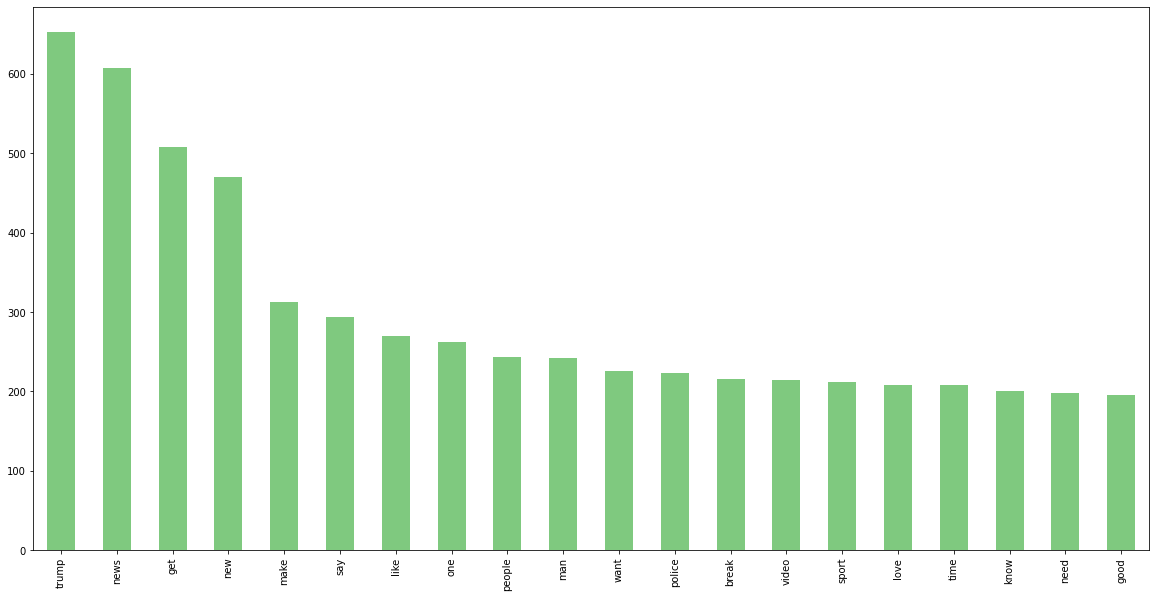

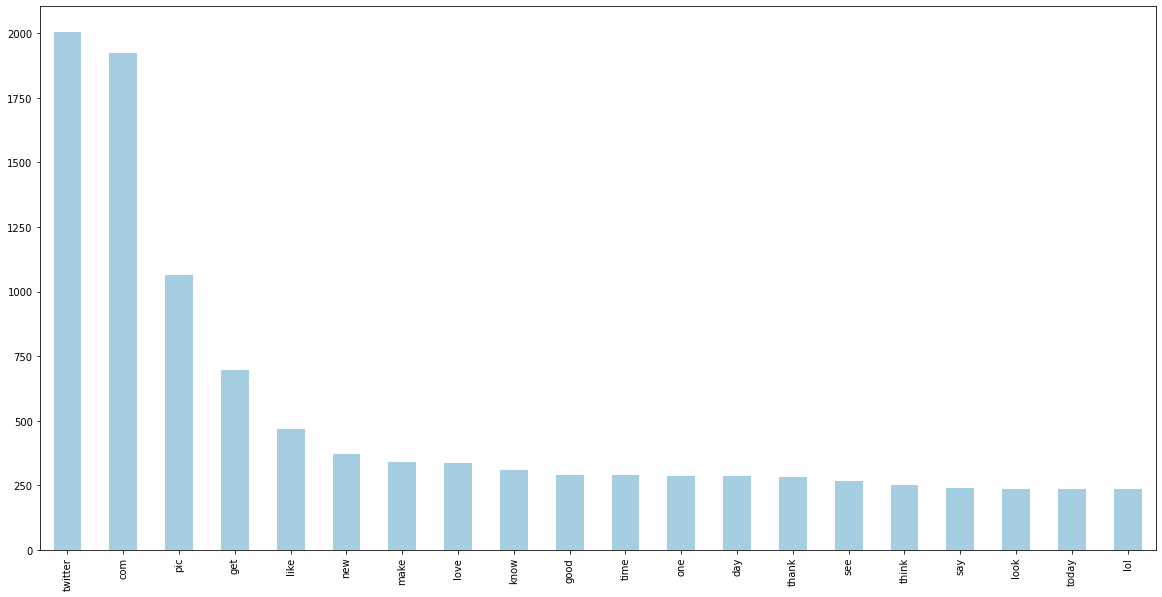

In [ ]:
color = ['Accent','Paired']
splitedData = [SpamTweet,QualityTweet]
for item in range(2):
  plt.figure(figsize=(20,10))
  pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[item])
  plt.show()

In [ ]:
dataset['Type'] = dataset.Type.map({'Quality':0, 'Spam':1})
print(dataset.shape)
dataset.head() # returns (rows, columns)

(20899, 3)


,Tweet,Type,CleanTweet
0,Good Morning Love @LeeBrown_V,0.0,good morning love leebrown
1,@realDonaldTrump @USNavy RIP TO HEROES',1.0,realdonaldtrump usnavy rip heroes
2,Haven't been following the news but I understa...,0.0,follow news understand eff dumbest things
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,pic twitter com ftlhz paper scissor glue paper...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,0.0,didyouknow mahatma gandhi make brief visit lec...


In [ ]:
dataset = dataset.reset_index()

In [ ]:
Tweet_list = dataset['CleanTweet'].tolist()
print(Tweet_list[:5])

['good morning love leebrown', 'realdonaldtrump usnavy rip heroes', 'follow news understand eff dumbest things', 'pic twitter com ftlhz paper scissor glue papercraft diy', 'didyouknow mahatma gandhi make brief visit lecture nottingham october mumblingnerd']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
'''
Practice node:
Print the 'count_vector' object which is an instance of 'CountVectorizer()'
'''
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
count_vector.fit(Tweet_list)
count_vector.get_feature_names()

['aaa',
 'aaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaah',
 'aaaaaamazing',
 'aaaahhh',
 'aaaand',
 'aaaehas',
 'aaas',
 'aaaw',
 'aacountyschools',
 'aacpsawesome',
 'aah',
 'aaihs',
 'aamy',
 'aan',
 'aangeklikt',
 'aangemeld',
 'aankijken',
 'aantal',
 'aaoastro',
 'aap',
 'aapa',
 'aapahod',
 'aardappelen',
 'aardodson',
 'aargh',
 'aarhus',
 'aarkstore',
 'aaron',
 'aashiq',
 'aasvvq',
 'aaww',
 'aaxzucnofz',
 'aaye',
 'aba',
 'abaga',
 'abam',
 'abandon',
 'abandonaaaaaaaaaaaaaaaaaaaaaaada',
 'abandonment',
 'abansundu',
 'abbamonte',
 'abbey',
 'abbn',
 'abbott',
 'abc',
 'abcactionnews',
 'abcgopdebate',
 'abcnews',
 'abcs',
 'abdicate',
 'abduct',
 'abdul',
 'abdulazeez',
 'abdulkareem',
 'abe',
 'abedin',
 'abernathy',
 'abet',
 'abezl',
 'abfamilytalk',
 'abff',
 'abfire',
 'abide',
 'ability',
 'abit',
 'abitofmybrain',
 'abjb',
 'abjlfv',
 'ablaze',
 'able',
 'aboard',
 'abolitionawards',
 'abono',
 'aboout',
 'abort',
 'abortion',
 'abortions',
 '

In [ ]:
doc_array = count_vector.transform(Tweet_list).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,aaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah,aaaaaaah,aaaaaamazing,aaaahhh,aaaand,aaaehas,aaas,aaaw,aacountyschools,aacpsawesome,aah,aaihs,aamy,aan,aangeklikt,aangemeld,aankijken,aantal,aaoastro,aap,aapa,aapahod,aardappelen,aardodson,aargh,aarhus,aarkstore,aaron,aashiq,aasvvq,aaww,aaxzucnofz,aaye,aba,abaga,abam,abandon,abandonaaaaaaaaaaaaaaaaaaaaaaada,...,zrodueiruv,zrtoixpfz,zsatpqozmg,zscpnmu,zstyz,zsw,zthjbcy,ztn,zucker,zuckerberg,zugly,zuid,zuivercor,zuk,zullnero,zuma,zumaqanda,zumaqandapic,zumba,zupaokf,zvgaf,zvgcrm,zvpxjrzu,zvz,zwaan,zwanger,zwdyryn,zwembad,zwkwx,zwubyhdinh,zxawysajyh,zxge,zxv,zydq,zyf,zzemif,zzoilyl,zzz,zzzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset = dataset.dropna()
dataset.head(50)

,index,Tweet,Type,CleanTweet
0,0,Good Morning Love @LeeBrown_V,0.0,good morning love leebrown
1,1,@realDonaldTrump @USNavy RIP TO HEROES',1.0,realdonaldtrump usnavy rip heroes
2,2,Haven't been following the news but I understa...,0.0,follow news understand eff dumbest things
3,3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,pic twitter com ftlhz paper scissor glue paper...
4,4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,0.0,didyouknow mahatma gandhi make brief visit lec...
5,5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",1.0,amms samantha bee try attack trump instead ins...
6,6,please don't talk about me like that i'm only ...,0.0,please talk like little tipsy
7,7,Politicshttps://twitter.com/ngunjiriwambugu/st...,0.0,politics
8,8,Banking on Brexit: is it time to Invest in the...,1.0,bank brexit time invest colin ward colinward i...
9,9,They are serving and protecting #5WordRegrets ...,1.0,serve protect wordregrets


In [ ]:
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['CleanTweet'], dataset['Type'], random_state=1)

print('Number of rows in the total set: {}'.format(dataset.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 20897
Number of rows in the training set: 15672
Number of rows in the test set: 5225


In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(testing_data)
print(predictions)

[1. 0. 1. ... 0. 0. 1.]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7793301435406699
Precision score:  0.767026423520655
Recall score:  0.7963678516228748
F1 score:  0.7814218009478673
